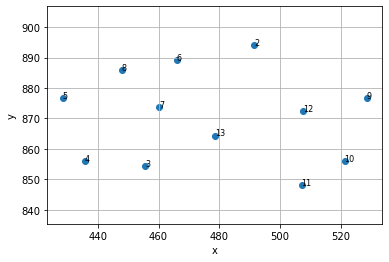

In [38]:
from levelTools import *  

basepath = 'C:/Users/Max/PCSX/UYA_map_tools/newtool/level49'

spawns = list_spawn_idx(basepath)
x_values, y_values, id_values = read_cuboid_XY(spawns,basepath)
plot_cuboids(x_values, y_values, id_values)

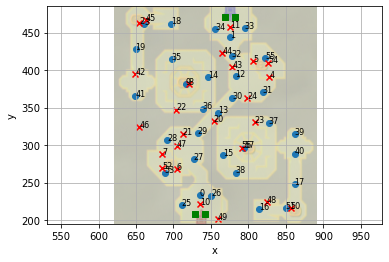

In [60]:
from PIL import Image
import struct
import matplotlib.pyplot as plt

# Search for files matching the pattern './gampeplay/moby/*Anti-Vehicle Missle Turret*/moby.bin'
matching_files = glob.glob(os.path.join(basepath,'./gameplay/moby/*Anti-Vehicle Missle Turret*/moby.bin'))

# Loop through the matching files
for file_path in matching_files:
    # Open the file for reading
    with open(file_path, 'rb') as file:
        # Seek to the desired position (0x40)
        file.seek(0x40)
        
        # Read 3 floats (x, y, z)
        x, y, z = struct.unpack('fff', file.read(3 * 4))
        
        # Append the values to the additional lists
        x_green_values.append(x)
        y_green_values.append(y)
        

# Create a scatter plot of x and y for IDs
plt.scatter(x_values, y_values)

# Add text labels for each ID point
for i in range(len(x_values)):
    plt.text(x_values[i], y_values[i], str(int(id_values[i])), fontsize=8)

# Add text labels for each additional file point
for i in range(len(x_additional_values)):
    plt.text(x_additional_values[i], y_additional_values[i], str(int(additional_ids[i])), fontsize=8)

# Create a scatter plot of x and y for additional files (red 'x' markers)
plt.scatter(x_additional_values, y_additional_values, marker='x', color='red')

# Overlay green squares for the additional x, y, and z values
plt.scatter(x_green_values, y_green_values, marker='s', color='green')


# Load the image file
image_path = '../../metromap.png'
image = Image.open(image_path)

# Scale the image
image = image.resize((1000, 1000))

# Get the dimensions of the image
image_width, image_height = image.size

# Calculate the x and y coordinates for the image start and end pixels
image_start_x = 620
image_end_x = 890  
image_start_y = 195
image_end_y = 485 

# Overlay the image on the plot
plt.imshow(image, extent=[image_start_x, image_end_x, image_start_y, image_end_y], alpha=0.5)

# Set the axis labels
plt.xlabel('x')
plt.ylabel('y')

# Add a grid to the plot
plt.grid(True)

# Set equal axis scaling
plt.axis('equal')

# Show the plot
plt.show()